In [14]:
import os
import numpy as np
import pandas as pd
import pickle
# pickle to serialize and save the downloaded data as a file, which will prevent our script from re-downloading the same data each time we run the script. 
import quandl
from datetime import datetime
import matplotlib.pyplot as plt
from pprint import pprint
import json
import time
import requests

# We'll also import Plotly and enable the offline mode.

import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
py.init_notebook_mode(connected = True)




# Bitcoin Visualization

In [2]:
# get bitcoin data
def quandl_bitcoin(exchange):
    
    return quandl.get(f'BCHARTS/{exchange}USD')
    

In [3]:
#function help to visualzie 
def df_scatter(df, title, seperate_y_axis=False, y_axis_label='', scale='linear', initial_hide=False):
    '''Generate a scatter plot of the entire dataframe'''
    label_arr = list(df)
    series_arr = list(map(lambda col: df[col], label_arr))
    
    layout = go.Layout(
        title=title,
        legend=dict(orientation="h"),
        xaxis=dict(type='date'),
        yaxis=dict(
            title=y_axis_label,
            showticklabels= not seperate_y_axis,
            type=scale
        )
    )
    
    y_axis_config = dict(
        overlaying='y',
        showticklabels=False,
        type=scale )
    
    visibility = 'visible'
    if initial_hide:
        visibility = 'legendonly'
        
    # Form Trace For Each Series
    trace_arr = []
    for index, series in enumerate(series_arr):
        trace = go.Scatter(
            x=series.index, 
            y=series, 
            name=label_arr[index],
            visible=visibility
        )
        
        # Add seperate axis for the series
        if seperate_y_axis:
            trace['yaxis'] = 'y{}'.format(index + 1)
            layout['yaxis{}'.format(index + 1)] = y_axis_config    
        trace_arr.append(trace)

    fig = go.Figure(data=trace_arr, layout=layout)
    py.iplot(fig)

In [4]:
# to visualzie bitcoin
exchanges = ['KRAKEN','COINBASE','BITSTAMP','ITBIT']
bitcoin_dict = {}
dataFramelist = []
for exchange in exchanges:
    data= quandl_bitcoin(exchange)
    bitcoin_dict[exchange] = data
    bitcoin_dict[exchange].replace(0, np.nan, inplace = True)
    plt.scatter(x = bitcoin_dict[exchange].index, y = bitcoin_dict[exchange]['Weighted Price'], label = exchange  )
    

In [6]:
# save as the dataset
exchanges = ['KRAKEN','COINBASE','BITSTAMP','ITBIT']
BTC_Dataset= {}
for exchange in exchanges:
    data= quandl_bitcoin(exchange)
    BTC_Dataset[exchange] = data['Weighted Price']
    BTC_Dataset[exchange].replace(0, np.nan, inplace = True)
    

In [7]:
# save weighted avg price from different exchange 
btc_dataset = pd.DataFrame.from_dict(BTC_Dataset)
btc_dataset["Avg_price"] = btc_dataset.mean(axis = 1)
btc_dataset.fillna(0)
#btc_dataset.to_csv("btc_dataset.csv")

,BITSTAMP,COINBASE,ITBIT,KRAKEN,Avg_price
Date,,,,,
2011-09-13,5.929231,0.000000,0.000000,0.000000,5.929231
2011-09-14,5.590798,0.000000,0.000000,0.000000,5.590798
2011-09-15,5.094272,0.000000,0.000000,0.000000,5.094272
2011-09-16,4.854515,0.000000,0.000000,0.000000,4.854515
2011-09-17,4.870000,0.000000,0.000000,0.000000,4.870000
2011-09-18,4.839576,0.000000,0.000000,0.000000,4.839576
2011-09-19,4.900000,0.000000,0.000000,0.000000,4.900000
2011-09-20,5.388054,0.000000,0.000000,0.000000,5.388054
2011-09-21,5.706075,0.000000,0.000000,0.000000,5.706075


In [18]:
# vislauze the weighted avg price for bitcoin 
btc_dataset = pd.read_csv("btc_dataset.csv").set_index("Date")
x = go.Scatter(x = btc_dataset.index, y = btc_dataset["Avg_price"])
py.iplot([x])

In [26]:
btc_dataset_avgP = pd.DataFrame(btc_dataset["Avg_price"])

In [27]:
df_scatter(btc_dataset_avgP, "bitcoin trend(log)", seperate_y_axis=False,  scale='log')

# crypotocurrency Visual

In [10]:
#https://poloniex.com/public?command=returnChartData&currencyPair=BTC_ETH&start=1420092000.0&end=1520108705.338483&period=86400
base_url = 'https://poloniex.com/public?command=returnChartData&currencyPair={}&start={}&end={}&period={}'
start_date = datetime.strptime('2015-01-01', '%Y-%m-%d') # get data from the start of 2015
end_date = datetime.now() # up until today
period = 86400

In [11]:
# export into a dataframe
def merge_dfs_on_column(dataframes, labels, col):
   
    series_dict = {}
    for index in range(len(dataframes)):
        series_dict[labels[index]] = dataframes[index][col]
        # return a dictionary with {'COINBASE':'Weighted Price info..', .......}
    return pd.DataFrame(series_dict)

In [12]:
# extract data from different crypoto
def crypotocurrency_data(crypoto, startDate, period ):
    crypoto_dict = {}
    end_date = datetime.now().timestamp()
    start_date = datetime.strptime(startDate, "%Y-%m-%d").timestamp()
    base_url = 'https://poloniex.com/public?command=returnChartData'
    url = f"{base_url}&currencyPair=BTC_{crypoto}&start={start_date}&end={end_date}&period={period}"
    response = requests.get(url).json()
    dataframe =pd.DataFrame.from_dict(response)
    
    dataframe["Date"] = [time.strftime("%Y-%m-%d", time.localtime(int(date))) for date in dataframe["date"]]
    dataframe.set_index('Date', inplace= True)
    #crypoto_dict[crypoto] = dataframe['weightedAverage']
    
    return dataframe
    
    

In [15]:
currencies = ['ETH','LTC','XRP','DASH']
currency_dict = {}
for currency in currencies:
    
    dataframe = crypotocurrency_data(currency, "2015-01-01", 86400 )
    currency_dict[currency] = dataframe

for currency in currencies:
    currency_dict[currency]['price_usd'] = currency_dict[currency]['weightedAverage'] * btc_dataset["Avg_price"]

combined_df= merge_dfs_on_column(list(currency_dict.values()), list(currency_dict.keys()), 'price_usd' )

#combined_df = pd.read_csv("combined_df.csv")

In [19]:
combined_df = pd.read_csv('combined_df.csv')
combined_df = combined_df.reset_index()

combined_df = combined_df.reset_index()
combined_df = combined_df.rename(columns = {"Unnamed: 0":"Date"})
combined_df= combined_df.set_index("Date")

del combined_df["index"]
del combined_df["level_0"]


combined_df['BTC_AVGPRICE'] = btc_dataset["Avg_price"]
combined_df.head()


,DASH,ETH,LTC,XRP,BTC_AVGPRICE
Date,,,,,
2015-01-01,1.980439,NaN,2.693779,0.024588,316.768392
2015-01-02,1.904308,NaN,2.502790,0.023352,315.785146
2015-01-03,1.858315,NaN,2.265920,0.020702,301.512433
2015-01-04,1.684498,NaN,2.119629,0.020462,276.706053
2015-01-05,1.648726,NaN,2.067935,0.020119,271.139494


In [20]:
df_scatter(combined_df, "Cryotpocurrency Analysis", seperate_y_axis=False, y_axis_label='Coin Value (USD)', scale='log')

# Matplotlib Visualziation

In [21]:
combined_df.head()

,DASH,ETH,LTC,XRP,BTC_AVGPRICE
Date,,,,,
2015-01-01,1.980439,NaN,2.693779,0.024588,316.768392
2015-01-02,1.904308,NaN,2.502790,0.023352,315.785146
2015-01-03,1.858315,NaN,2.265920,0.020702,301.512433
2015-01-04,1.684498,NaN,2.119629,0.020462,276.706053
2015-01-05,1.648726,NaN,2.067935,0.020119,271.139494


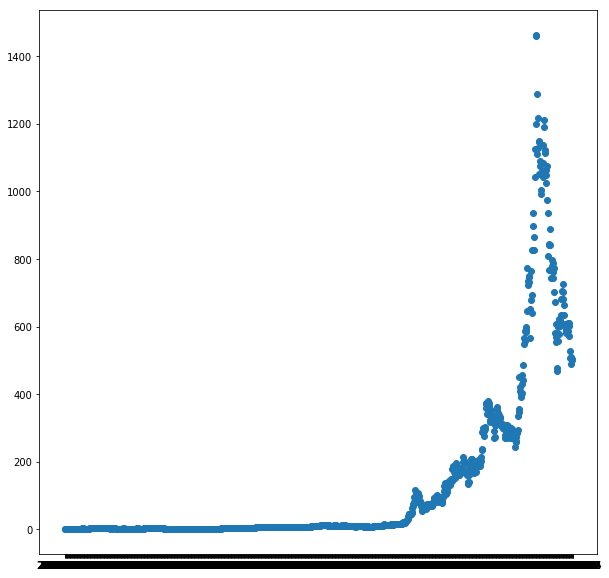

In [23]:
plt.figure(figsize= (10,10))
plt.scatter(combined_df.index, combined_df['DASH'] )
plt.show()